In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
len(x_train)
len(x_test)

10000

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
type(x_train[0])

numpy.ndarray

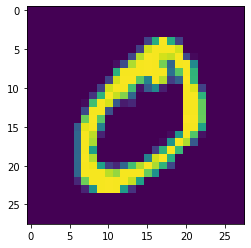

In [ ]:
plt.imshow(x_train[1])

In [ ]:
y_train[1]

0

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)
print(x_train_flattened.shape)
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


In [ ]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(x_train_flattened,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4694 - accuracy: 0.8769
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3045 - accuracy: 0.9148
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9201
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2740 - accuracy: 0.9235
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2670 - accuracy: 0.9251
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2622 - accuracy: 0.9268
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2588 - accuracy: 0.9284
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2558 - accuracy: 0.9290
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2529 - accuracy: 0.9301
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.25

In [ ]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2647 - accuracy: 0.9269


[0.26467156410217285, 0.9269000291824341]

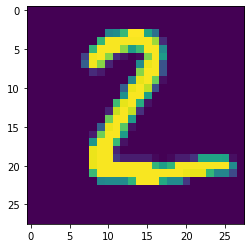

In [ ]:
plt.imshow(x_test[1])

In [ ]:
y_predicted=model.predict(x_test_flattened)
y_predicted[1]

array([2.0380908e-01, 4.3093264e-03, 9.9979532e-01, 7.1056545e-02,
       2.4494983e-12, 8.7400770e-01, 9.5229089e-01, 3.5270664e-17,
       6.4512879e-02, 2.5738201e-14], dtype=float32)

In [ ]:
np.argmax(y_predicted[1])

2

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    0,    6,    9,    4,    1,    0],
       [   0, 1110,    4,    2,    0,    1,    4,    2,   12,    0],
       [   5,    8,  929,   19,    8,    4,   13,   10,   33,    3],
       [   2,    0,   17,  929,    1,   21,    3,   11,   20,    6],
       [   1,    1,    5,    2,  917,    0,   11,    7,   10,   28],
       [   7,    2,    1,   41,    9,  775,   16,    7,   29,    5],
       [  10,    3,    6,    2,    7,   12,  915,    1,    2,    0],
       [   1,    6,   25,    3,    4,    1,    0,  961,    2,   25],
       [   6,    7,    8,   26,    9,   25,   10,   12,  865,    6],
       [  10,    7,    1,    9,   28,    5,    0,   29,    8,  912]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

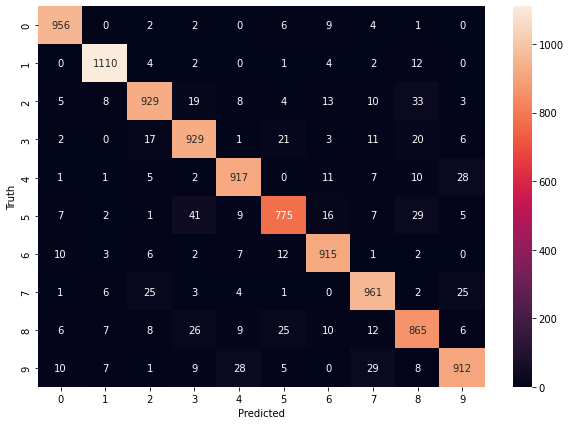

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Model with Hidden layers

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(x_train_flattened,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2689 - accuracy: 0.9241
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1231 - accuracy: 0.9641
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0859 - accuracy: 0.9748
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0665 - accuracy: 0.9798
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0524 - accuracy: 0.9841
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0424 - accuracy: 0.9866
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0347 - accuracy: 0.9894
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0284 - accuracy: 0.9912
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0241 - accuracy: 0.9927
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.02

In [ ]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0933 - accuracy: 0.9783


[0.09333828836679459, 0.9782999753952026]

In [ ]:
y_predicted=model.predict(x_test_flattened)
y_predicted[1]

array([2.4832927e-05, 7.9884559e-01, 1.0000000e+00, 6.4867795e-02,
       1.5145498e-13, 3.8698316e-04, 3.6307338e-05, 4.3636321e-15,
       4.1818196e-01, 3.4953351e-10], dtype=float32)

In [ ]:
np.argmax(y_predicted[1])

2

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    1,    2,    0,    1,    1,    1,    2,    1,    3],
       [   0, 1125,    5,    0,    0,    1,    3,    1,    0,    0],
       [   3,    1, 1016,    0,    1,    0,    2,    4,    5,    0],
       [   0,    1,    7,  984,    0,    4,    0,    4,    4,    6],
       [   1,    0,    2,    1,  963,    0,    6,    1,    2,    6],
       [   3,    0,    0,   12,    1,  859,    3,    2,    9,    3],
       [   4,    2,    1,    1,    4,    1,  945,    0,    0,    0],
       [   0,    4,    5,    0,    2,    1,    0, 1010,    3,    3],
       [   1,    1,    6,    7,    3,    5,    3,    4,  938,    6],
       [   2,    2,    0,    2,   12,    3,    1,    9,    4,  974]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

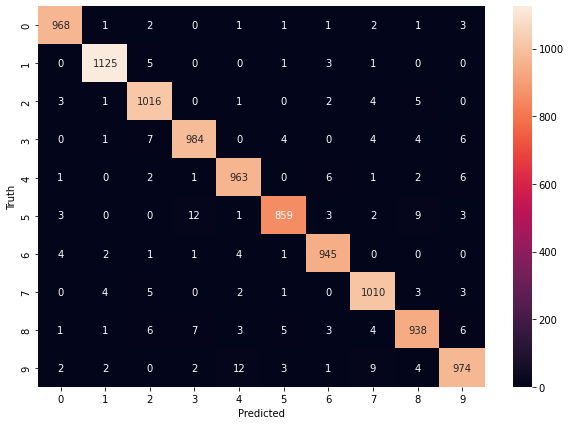

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Without flatten**

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),   ##****
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2749 - accuracy: 0.9229
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1248 - accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0862 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0663 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0520 - accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0413 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0337 - accuracy: 0.9900
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0270 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0230 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.01